In [2]:
import pandas as pd
options=pd.read_csv(r'D:/Course_Paper/options_common_table_0304.csv')

In [3]:
del options['Unnamed: 0']

In [4]:
risk=pd.read_csv(r'D:/Course_Paper/options_risk_common_table_0304.csv')

In [5]:
del risk['Unnamed: 0']

In [6]:
import numpy as np
#Делаем левое объединение таблиц, чтобы добавить информацию об expiration date для call опционов
options_info=options.merge(risk, how = 'left', left_on=['REFERENCE_DATE','CONTRACT'], right_on=['REFERENCE_DATE','TICKER'])
#Удаляем строки, где есть NaN в столбцах
options_info = options_info.dropna(axis='index', how='any', subset=['TICKER'])
#Переиндексация
options_info.index = np.arange(len(options_info))

In [7]:
import datetime as DT
options_info.iloc[:,0]=pd.to_datetime(options_info.iloc[:,0],format='%Y-%m-%d')

In [8]:
options_info.iloc[:,8]=pd.to_datetime(options_info.iloc[:,8],format='%Y-%m-%d')

In [9]:
del options_info['IM_BUY']

In [15]:
def get_year(date):
    return date.year

In [17]:
options_info['YEAR'] = options_info['REFERENCE_DATE'].apply(get_year)

In [18]:
options_info

,REFERENCE_DATE,CONTRACT,FUT_CONTR,STRIKE,PUT,THEORPRICE,VOLAT,BASEGOBUY,EXP_DATE,TICKER,IM_NOTCOVSELL,IM_COVSELL,YEAR
0,2016-07-04,BR-8.16M260716CA 38,BR-8.16,38.0,C,12.12,46.61909,4482.75,2016-07-26,BR-8.16M260716CA 38,4506.46,899.76,2016
1,2016-07-04,BR-8.16M260716CA 46,BR-8.16,46.0,C,4.53,37.49964,3139.60,2016-07-26,BR-8.16M260716CA 46,4337.41,2403.09,2016
2,2016-07-04,BR-8.16M260716CA 47,BR-8.16,47.0,C,3.73,36.93442,2667.88,2016-07-26,BR-8.16M260716CA 47,4237.57,2568.98,2016
3,2016-07-04,BR-8.16M260716CA 48,BR-8.16,48.0,C,3.00,36.47908,2182.97,2016-07-26,BR-8.16M260716CA 48,4100.94,2795.45,2016
4,2016-07-04,BR-8.16M260716CA 49,BR-8.16,49.0,C,2.36,36.12862,1731.16,2016-07-26,BR-8.16M260716CA 49,3916.74,3136.59,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
990078,2020-02-11,VTBR-9.20M160920CA10750,VTBR-9.20,10750.0,C,9.00,45.58581,8.85,2020-09-16,VTBR-9.20M160920CA10750,81.41,929.46,2020
990079,2020-02-11,VTBR-9.20M160920CA5250,VTBR-9.20,5250.0,C,271.00,30.27834,267.33,2020-09-16,VTBR-9.20M160920CA5250,713.21,839.83,2020
990080,2020-02-11,VTBR-9.20M160920CA5750,VTBR-9.20,5750.0,C,153.00,30.46863,152.36,2020-09-16,VTBR-9.20M160920CA5750,564.16,894.27,2020
990081,2020-02-11,VTBR-9.20M160920PA2250,VTBR-9.20,2250.0,P,12.00,49.84617,11.05,2020-09-16,VTBR-9.20M160920PA2250,81.41,984.52,2020


In [11]:
options_info.iloc[0,0].year

2016

In [30]:
options_info_group=options_info.groupby(['YEAR'])['CONTRACT'].unique()
print(len(options_info_group[2016]))
print(len(options_info_group[2017]))
print(len(options_info_group[2018]))
print(len(options_info_group[2019]))
print(len(options_info_group[2020]))

3840
7180
9086
9500
2220


In [33]:
import math
from scipy.stats import norm
"""Создаем функцию, которая считает цену опциона"""
def option_price_share(price, strike, IV, time, put=False):
    ln=math.log(price/strike)
    denom=IV*math.sqrt(time)
    d1=(((IV**2)/2)*time+ln)/denom
    d2=d1-denom
    
    Nd1=norm.cdf(d1, loc=0, scale=1)
    Nd2=norm.cdf(d2, loc=0, scale=1)
    Nd_1=norm.cdf(-d1, loc=0, scale=1)
    Nd_2=norm.cdf(-d2, loc=0, scale=1)
    option=price*Nd1-strike*Nd2
    if put:
        option=strike*Nd_2-price*Nd_1
    return option

In [10]:
options_info.iloc[0,8]-options_info.iloc[0,0]

Timedelta('22 days 00:00:00')

In [34]:
option_price_share(50.11,38,46.61909/100,22/365)

12.122889278274563

In [12]:
norm.cdf(50, loc=0, scale=1)

1.0

In [27]:
a = np.arange(-3.5, 3.5, 0.1)

In [28]:
b=norm.cdf(a, loc=0, scale=1)
c=norm.pdf(a, loc=0, scale=1)

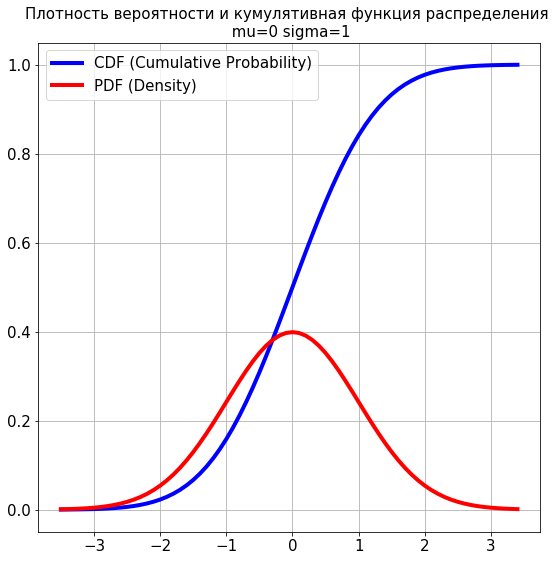

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
plt.plot(a, b,color='blue',linewidth=4, label='CDF (Cumulative Probability)')
plt.plot(a, c,color='red',linewidth=4,label='PDF (Density)')
plt.title('Плотность вероятности и кумулятивная функция распределения \n mu=0 sigma=1',fontsize=15)
plt.legend(fontsize=15)
plt.tick_params(labelsize=15)
plt.grid()

#plt.show()
plt.savefig('call_long_price_time.png', dpi = 1000,transparent=True)